# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [75]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [76]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellis'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [77]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [78]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:300])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/5/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-5-2021">
     14,292.17893
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden"


In [79]:
tr = table.find_all('tr', attrs={'class':''})
tr

[<tr><td>3/5/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/3-5-2021">14,292.17893</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-5-2021">USD IDR rate for 3/5/2021</a></td></tr>,
 <tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>,
 <tr><td>3/3/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a></td></tr>,
 <tr><td>3/2/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-2-2021">14,256.28041</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-2-2021">USD IDR rate for 3/2/2021</a></td></tr>,
 <tr><td>3/1/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/3-1-2021">14,248.60576</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

Do the scrapping process here (please change this markdown with your explanation)

In [80]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr', attrs = {'class':''})[i]

    #get date 
    date = row.find_all('td')[0].text
    date = date.strip()
    
    #get day name
    day = row.find_all('td')[1].text
    day = day.strip()
    
    #get value 
    value = row.find_all('td')[2].text
    value = value.strip()
    
    #scrapping process
    temp.append((date, day, value))
temp 

[('3/4/2021', 'Thursday', '14,261.85426 IDR'),
 ('3/3/2021', 'Wednesday', '14,257.29443 IDR'),
 ('3/2/2021', 'Tuesday', '14,256.28041 IDR'),
 ('3/1/2021', 'Monday', '14,248.60576 IDR'),
 ('2/26/2021', 'Friday', '14,300.27815 IDR'),
 ('2/25/2021', 'Thursday', '14,139.73096 IDR'),
 ('2/24/2021', 'Wednesday', '14,083.03673 IDR'),
 ('2/23/2021', 'Tuesday', '14,092.64503 IDR'),
 ('2/22/2021', 'Monday', '14,118.07274 IDR'),
 ('2/19/2021', 'Friday', '14,066.79375 IDR'),
 ('2/18/2021', 'Thursday', '14,013.51318 IDR'),
 ('2/17/2021', 'Wednesday', '14,015.16095 IDR'),
 ('2/16/2021', 'Tuesday', '13,935.96629 IDR'),
 ('2/15/2021', 'Monday', '13,918.18725 IDR'),
 ('2/12/2021', 'Friday', '13,988.54710 IDR'),
 ('2/11/2021', 'Thursday', '13,982.27900 IDR'),
 ('2/10/2021', 'Wednesday', '13,994.09212 IDR'),
 ('2/9/2021', 'Tuesday', '13,920.52018 IDR'),
 ('2/8/2021', 'Monday', '14,007.25257 IDR'),
 ('2/5/2021', 'Friday', '14,008.99630 IDR'),
 ('2/4/2021', 'Thursday', '14,020.87878 IDR'),
 ('2/3/2021', 'W

In [81]:
temp = temp [::-1]
temp

[('9/6/2020', 'Sunday', '14,754.95155 IDR'),
 ('9/7/2020', 'Monday', '14,743.92989 IDR'),
 ('9/8/2020', 'Tuesday', '14,839.54267 IDR'),
 ('9/9/2020', 'Wednesday', '14,783.50009 IDR'),
 ('9/10/2020', 'Thursday', '14,871.58664 IDR'),
 ('9/11/2020', 'Friday', '14,865.27553 IDR'),
 ('9/13/2020', 'Sunday', '14,876.45021 IDR'),
 ('9/14/2020', 'Monday', '14,864.65988 IDR'),
 ('9/15/2020', 'Tuesday', '14,843.44670 IDR'),
 ('9/16/2020', 'Wednesday', '14,807.88761 IDR'),
 ('9/17/2020', 'Thursday', '14,829.41738 IDR'),
 ('9/18/2020', 'Friday', '14,730.71792 IDR'),
 ('9/20/2020', 'Sunday', '14,728.84529 IDR'),
 ('9/21/2020', 'Monday', '14,701.43420 IDR'),
 ('9/22/2020', 'Tuesday', '14,751.85786 IDR'),
 ('9/23/2020', 'Wednesday', '14,825.54899 IDR'),
 ('9/24/2020', 'Thursday', '14,888.78607 IDR'),
 ('9/25/2020', 'Friday', '14,855.63943 IDR'),
 ('9/27/2020', 'Sunday', '14,859.98349 IDR'),
 ('9/28/2020', 'Monday', '14,892.32194 IDR'),
 ('9/29/2020', 'Tuesday', '14,880.93210 IDR'),
 ('9/30/2020', 'Wed

## Creating data frame & Data wrangling

Put the array into dataframe

In [82]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date', 'day', 'value'))
df.head()

,date,day,value
0,9/6/2020,Sunday,"14,754.95155 IDR"
1,9/7/2020,Monday,"14,743.92989 IDR"
2,9/8/2020,Tuesday,"14,839.54267 IDR"
3,9/9/2020,Wednesday,"14,783.50009 IDR"
4,9/10/2020,Thursday,"14,871.58664 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [83]:
#Deleting IDR and comma
df['value'] = df['value'].replace('IDR',"",regex=True).replace(',',"",regex=True)
df.head()

,date,day,value
0,9/6/2020,Sunday,14754.95155
1,9/7/2020,Monday,14743.92989
2,9/8/2020,Tuesday,14839.54267
3,9/9/2020,Wednesday,14783.50009
4,9/10/2020,Thursday,14871.58664


In [84]:
df.dtypes

date     object
day      object
value    object
dtype: object

In [85]:
#Changing type of data
df['value'] = df['value'].astype('float64')
df['date'] = df['date'].astype('datetime64')
df.dtypes

date     datetime64[ns]
day              object
value           float64
dtype: object

In [86]:
#set date as index
df.set_index('date', inplace=True)

In [89]:
df.head()

,day,value
date,,
2020-09-06,Sunday,14754.95155
2020-09-07,Monday,14743.92989
2020-09-08,Tuesday,14839.54267
2020-09-09,Wednesday,14783.50009
2020-09-10,Thursday,14871.58664


<AxesSubplot:xlabel='date'>

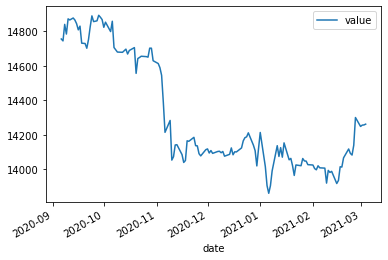

In [88]:
df.plot(kind='line')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Analysis :
- At the end of October to early November dollar went bearish from 14600 to 14200, approximately 400 points.
- Dollar went sideways at November 20 until January 21, but at the end of January it went below 14000 (the lowest).
- Dollar went bullish at the end of March more than 300 points, it happened at mid of March until early April. 
- April is the highest of dollar value after down for 6 months. 


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.